<a href="https://colab.research.google.com/github/JaejinLee1215/DeepLearning/blob/main/JaejinLee1215/prophet_%EC%9D%B4%EC%9E%AC%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 페이스북(현 메타)에서 만든 시계열 데이터 예측 패키지
!pip install prophet --quiet

In [2]:
!pip install pyupbit --quiet # 업비트에서 제공하는 API (가격, 거래)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 8.8 MB/s eta 0:00:00


In [3]:
!pip install finance-datareader --quiet # 주식 데이터

In [4]:
# Python
import pandas as pd # pandas
from prophet import Prophet # prophet -> Prophet
import pyupbit
# import FinanceDataReader as fdr

In [5]:
# df = fdr.DataReader('O')
# df.tail()

In [6]:
# pyupbit.get_ohlcv() # 200일치 KRW-BTC (원-비트코인)
# pyupbit.get_ohlcv("KRW-ETH") # 200일치 KRW-ETH (원-이더리움)
# pyupbit.get_ohlcv("KRW-BTC", interval='minutes60') # 200시간치 KRW-BTC
# 365일 * 24시간치의 KRW-BTC
pyupbit.get_ohlcv("KRW-BTC", interval='minutes60', count=24 * 365)

,open,high,low,close,volume,value
2022-04-05 06:00:00,56639000.0,57069000.0,56536000.0,57007000.0,360.486115,2.049050e+10
2022-04-05 07:00:00,57026000.0,57300000.0,56900000.0,57097000.0,385.115557,2.197014e+10
2022-04-05 08:00:00,57097000.0,57297000.0,57000000.0,57055000.0,296.830862,1.695866e+10
2022-04-05 09:00:00,57069000.0,57230000.0,56900000.0,56956000.0,386.354909,2.204575e+10
2022-04-05 10:00:00,56956000.0,57084000.0,56850000.0,57056000.0,174.597771,9.947299e+09
...,...,...,...,...,...,...
2023-04-05 11:00:00,37604000.0,37765000.0,37489000.0,37521000.0,371.354561,1.397136e+10
2023-04-05 12:00:00,37536000.0,37544000.0,37420000.0,37534000.0,213.314121,7.997101e+09
2023-04-05 13:00:00,37544000.0,37607000.0,37529000.0,37560000.0,189.810884,7.130359e+09
2023-04-05 14:00:00,37583000.0,37622000.0,37528000.0,37554000.0,155.055096,5.826405e+09


In [7]:
# df = pyupbit.get_ohlcv(interval='day', count=365)
# df = pyupbit.get_ohlcv(interval='minute60', count=365 * 24 * 3)
# 한국원화-비트코인 / 1시간치 / 365일 24시간 3년 -> 3년치 1시간 데이터
df = pyupbit.get_ohlcv(ticker="KRW-BTC", interval='minute60', count=365 * 24 * 3)
df.tail()

,open,high,low,close,volume,value
2023-04-05 11:00:00,37604000.0,37765000.0,37489000.0,37521000.0,371.354561,1.397136e+10
2023-04-05 12:00:00,37536000.0,37544000.0,37420000.0,37534000.0,213.314121,7.997101e+09
2023-04-05 13:00:00,37544000.0,37607000.0,37529000.0,37560000.0,189.810884,7.130359e+09
2023-04-05 14:00:00,37583000.0,37622000.0,37528000.0,37554000.0,155.055096,5.826405e+09
2023-04-05 15:00:00,37558000.0,37568000.0,37519000.0,37553000.0,59.127624,2.219675e+09


ds : 데이터의 시간 값 (index)<br>
y : 변동되는 대상이 되는 값 (close)

In [8]:
df['ds'] = df.index
df.tail()

,open,high,low,close,volume,value,ds
2023-04-05 11:00:00,37604000.0,37765000.0,37489000.0,37521000.0,371.354561,1.397136e+10,2023-04-05 11:00:00
2023-04-05 12:00:00,37536000.0,37544000.0,37420000.0,37534000.0,213.314121,7.997101e+09,2023-04-05 12:00:00
2023-04-05 13:00:00,37544000.0,37607000.0,37529000.0,37560000.0,189.810884,7.130359e+09,2023-04-05 13:00:00
2023-04-05 14:00:00,37583000.0,37622000.0,37528000.0,37554000.0,155.055096,5.826405e+09,2023-04-05 14:00:00
2023-04-05 15:00:00,37558000.0,37568000.0,37519000.0,37553000.0,59.127624,2.219675e+09,2023-04-05 15:00:00


In [9]:
# shift -> 1 / -1
# 1        NULL
# 2   ->     1
# 3          2
# 현재 종가 / 1시간 전 종가
df['y'] = df['close'] / df['close'].shift(1) # 상승률
# df['y'] = df['close']

In [10]:
df.tail()

,open,high,low,close,volume,value,ds,y
2023-04-05 11:00:00,37604000.0,37765000.0,37489000.0,37521000.0,371.354561,1.397136e+10,2023-04-05 11:00:00,0.997793
2023-04-05 12:00:00,37536000.0,37544000.0,37420000.0,37534000.0,213.314121,7.997101e+09,2023-04-05 12:00:00,1.000346
2023-04-05 13:00:00,37544000.0,37607000.0,37529000.0,37560000.0,189.810884,7.130359e+09,2023-04-05 13:00:00,1.000693
2023-04-05 14:00:00,37583000.0,37622000.0,37528000.0,37554000.0,155.055096,5.826405e+09,2023-04-05 14:00:00,0.999840
2023-04-05 15:00:00,37558000.0,37568000.0,37519000.0,37553000.0,59.127624,2.219675e+09,2023-04-05 15:00:00,0.999973


In [11]:
# Python
m = Prophet() # 객체 (Model)
m.fit(df) # ds, y

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8v6ttrr2/v0jfp2yt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8v6ttrr2/pr0qp5mh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77011', 'data', 'file=/tmp/tmp8v6ttrr2/v0jfp2yt.json', 'init=/tmp/tmp8v6ttrr2/pr0qp5mh.json', 'output', 'file=/tmp/tmp8v6ttrr2/prophet_modelkury4_3n/prophet_model-20230405062954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:29:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:29:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=24,
                                 freq='H' # H : 시간
                                 # D : 일자
                                 ) # 예측하고 싶은 단위 길이
# predict : 예측
forecast = m.predict(future)

In [13]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
26299,2023-04-06 11:00:00,1.000033,0.991223,1.006989,1.000033,1.000033,-0.000586,-0.000586,-0.000586,-0.000492,...,5.385159e-05,5.385159e-05,5.385159e-05,-0.000147,-0.000147,-0.000147,0.0,0.0,0.0,0.999447
26300,2023-04-06 12:00:00,1.000033,0.991077,1.008194,1.000033,1.000033,-0.000599,-0.000599,-0.000599,-0.000486,...,3.636048e-05,3.636048e-05,3.636048e-05,-0.000149,-0.000149,-0.000149,0.0,0.0,0.0,0.999435
26301,2023-04-06 13:00:00,1.000033,0.991143,1.008419,1.000033,1.000033,-0.000485,-0.000485,-0.000485,-0.000353,...,1.867784e-05,1.867784e-05,1.867784e-05,-0.000150,-0.000150,-0.000150,0.0,0.0,0.0,0.999549
26302,2023-04-06 14:00:00,1.000033,0.991513,1.007965,1.000033,1.000033,-0.000295,-0.000295,-0.000295,-0.000145,...,9.928171e-07,9.928171e-07,9.928171e-07,-0.000151,-0.000151,-0.000151,0.0,0.0,0.0,0.999738
26303,2023-04-06 15:00:00,1.000033,0.991350,1.008178,1.000033,1.000033,-0.000138,-0.000138,-0.000138,0.000031,...,-1.650485e-05,-1.650485e-05,-1.650485e-05,-0.000153,-0.000153,-0.000153,0.0,0.0,0.0,0.999895


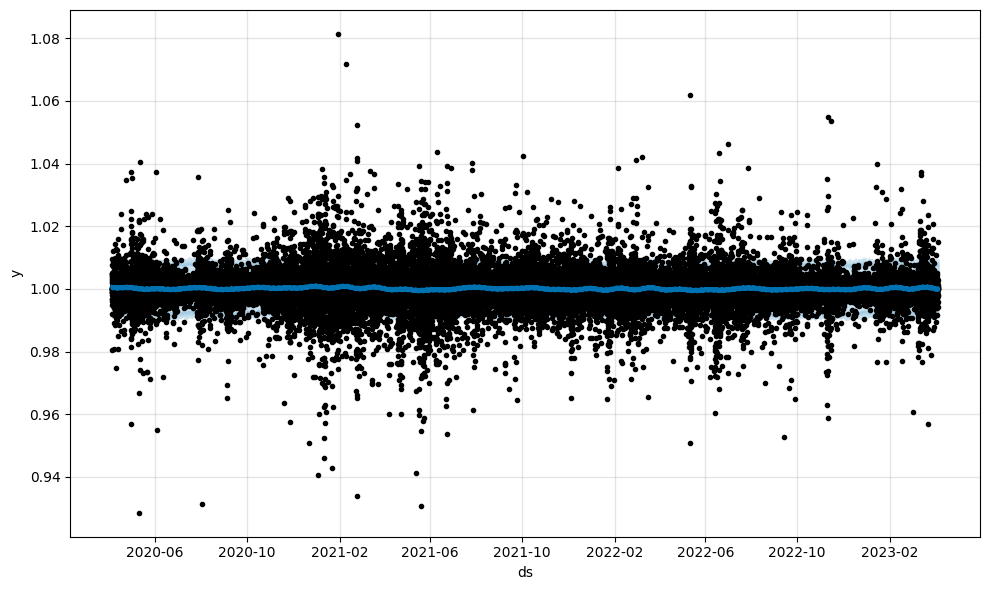

In [14]:
fig1 = m.plot(forecast)

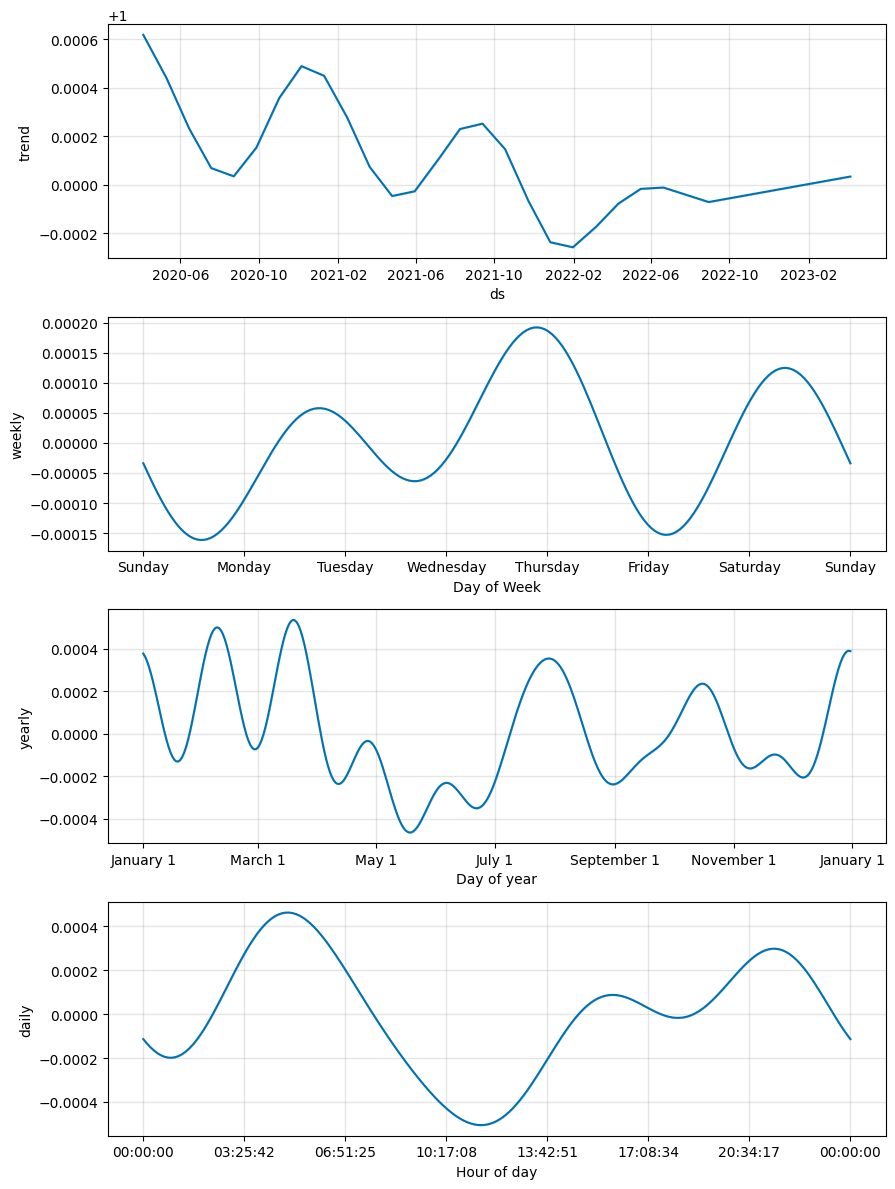

In [15]:
fig2 = m.plot_components(forecast)